In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from cue.analysis.analysis import serial_pos_curve, crp, p_first_recall
from cue.analysis.io import read_exp_data

In [4]:
sns.set('paper', 'ticks', None)

In [5]:
textwidth = 460.72124 / 72.27
row_height = textwidth / 1.5 / 1.6
single_fig_size = [textwidth / 1.5, row_height]

# Serial recall

In [5]:
data = serial_pos_curve(
    read_exp_data('../../data/experimental/Jahnke68/10item_0sec.csv'))

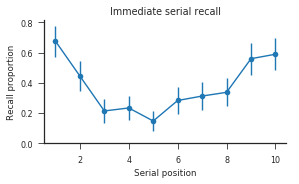

In [18]:
fig = plt.figure(figsize=single_fig_size)
ax = fig.add_subplot(1, 1, 1)
data['correct'].plot(
    marker='o', ax=ax, yerr=data[['ci_low', 'ci_upp']].values.T)

ax.set_ylim(bottom=0.)

ax.set_title("Immediate serial recall")
ax.set_xlabel("Serial position")
ax.set_ylabel("Recall proportion")

sns.despine(fig)
fig.tight_layout()

In [19]:
fig.savefig('../../../phd-thesis/figures/exp-serial-pos.pdf', bbox_inches='tight', pad_inches=0.)

# Free recall

In [6]:
immed = read_exp_data('../../data/experimental/HowaKaha99/Immed.dat')
delayed = read_exp_data('../../data/experimental/HowaKaha99/Ltr0.dat')
contdist = read_exp_data('../../data/experimental/HowaKaha99/Ltr3.dat')

In [7]:
immed_pf = p_first_recall(immed)
delayed_pf = p_first_recall(delayed)
contdist_pf = p_first_recall(contdist)

In [8]:
immed_crp = crp(immed)
delayed_crp = crp(delayed)
contdist_crp = crp(contdist)

In [9]:
names = ('immediate', 'delayed', 'continuous distractor')
styles = ('-', ':', ':')

/home/jgosmann/.pyenv/versions/3.6.1/lib/python3.6/site-packages/numpy/core/numeric.py:531: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


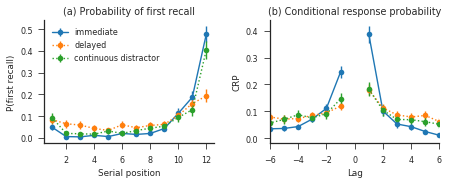

In [10]:
fig = plt.figure(figsize=(textwidth, row_height))

ax1 = fig.add_subplot(1, 2, 1)
for name, style, df in zip(names, styles, (immed_pf, delayed_pf, contdist_pf)):
    df['p_first'].plot(
        marker='o', linestyle=style,
        label=name, ax=ax1,
        yerr=df[['ci_low', 'ci_upp']].values.T)
ax1.set_title("(a) Probability of first recall")
ax1.set_xlabel("Serial position")
ax1.set_ylabel("P(first recall)")
ax1.legend(loc='best')

ax2 = fig.add_subplot(1, 2, 2)
for name, style, df in zip(names, styles, (immed_crp, delayed_crp, contdist_crp)):
    df['crp'].plot(
        marker='o', linestyle=style,
        label=name, ax=ax2,
        yerr=df[['ci_low', 'ci_upp']].values.T)
ax2.set_xlim(-6, 6)
ax2.set_title("(b) Conditional response probability")
ax2.set_xlabel("Lag")
ax2.set_ylabel("CRP")

sns.despine(fig)
fig.tight_layout()

In [11]:
fig.savefig('../../../phd-thesis/figures/exp-free-recall.pdf', bbox_inches='tight', pad_inches=0.)